Dataset source : https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image

In [2]:
data = pd.read_excel('Data/Dataset.xlsx', sheet_name = 'Sheet1')
data.shape

(11565, 34)

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


## About the data :
I read this dataset is the only real-word open-source insurance dataset available online and unfortunatlly I couldn't find the explainations for each column so I had to guess what each column represent in the dataset

In [4]:
for col in data.columns :
    print(col + ":")
    print(data[col].unique())
    print("--------------------------------------------------------")

Month:
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Mar' 'Aug' 'Apr' 'Jul' 'May' 'Sep' 'Nov']
--------------------------------------------------------
WeekOfMonth:
[5 3 2 1 4]
--------------------------------------------------------
DayOfWeek:
['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Thursday']
--------------------------------------------------------
Make:
['Honda' 'Toyota' 'Mazda' 'Ford' 'Chevrolet' 'Pontiac' 'Dodge' 'Accura'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------------
AccidentArea:
['Urban' 'Rural']
--------------------------------------------------------
DayOfWeekClaimed:
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday' 0]
--------------------------------------------------------
MonthClaimed:
['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Mar' 'Aug' 'May' 'Apr' 'Jun' 'Sep' 'Oct' 0]
--------------------------------------------------------
WeekOfMonthClaimed:
[1 

## My understanding of the data columns :



### Inofrmation about the current date, claim date and accident date:

* Year ,Month , WeekOfMonth, DayOfWeek : The current date

* DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed :the date the claim was made

* Days_Policy_Accident : number of days between accident date and now 

* Days_Policy_Claim : number of days between claim date and now


------------------------------------------------------

### Information about the policyholder (costumer) :

* Sex, MaritalStatus, Age : personal information

* DriverRating : (probably) the rate to the driving skills 

* NumberOfCars : the number of cars the driver owns

* AddressChange_Claim : the last time the driver changed their address

* PastNumberOfClaims: the number of claims that has been made by this driver 

* PolicyNumber : the number assigned to this policyholder in the system

------------------------------------------------------

### Information about the car :

* Make : the company which made the car

* AgeOfVehicle, VehicleCategory,VehiclePrice : car information

------------------------------------------------------

### Information about the claim/accident  :

* AccidentArea: if accident was in the Urban or Rural area

* Fault : if the fault goes to Policy Holder or Third Party

* PoliceReportFiled: if the police was involved and filed the accident

* WitnessPresent: if any witnesses was present and can provide information

* RepNumber : the representative number who eneterd the claim in the system

* AgeOfPolicyHolder: the age range of the driver

* ClaimSize: the claim amount

* FraudFound_P : if a fraud was found in the claim

------------------------------------------------------

### Information about the policy type :

* PolicyType: the type of the policy of the policyholder

* Deductible

* BasePolicy

------------------------------------------------------

### Columns I could't guess what they are :

* AgentType: ['External' 'Internal']

* NumberOfSuppliments: ['none' 'more than 5' '1 to 2' '3 to 5']



## Distribution of the data with respect to the target

In [5]:
data.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
PolicyType               object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating            float64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year    

In [6]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

numeric_data.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
0,5,1,21.0,0,1,12,300,1.0,1994,55526.069421
1,3,4,34.0,0,2,15,400,4.0,1994,59294.455571
2,5,2,47.0,0,3,7,400,3.0,1994,71756.941320
3,2,1,65.0,0,4,4,400,2.0,1994,7584.153493
4,1,3,36.0,0,7,14,400,1.0,1994,98545.374339


***

### Numerical Data Distribution

***

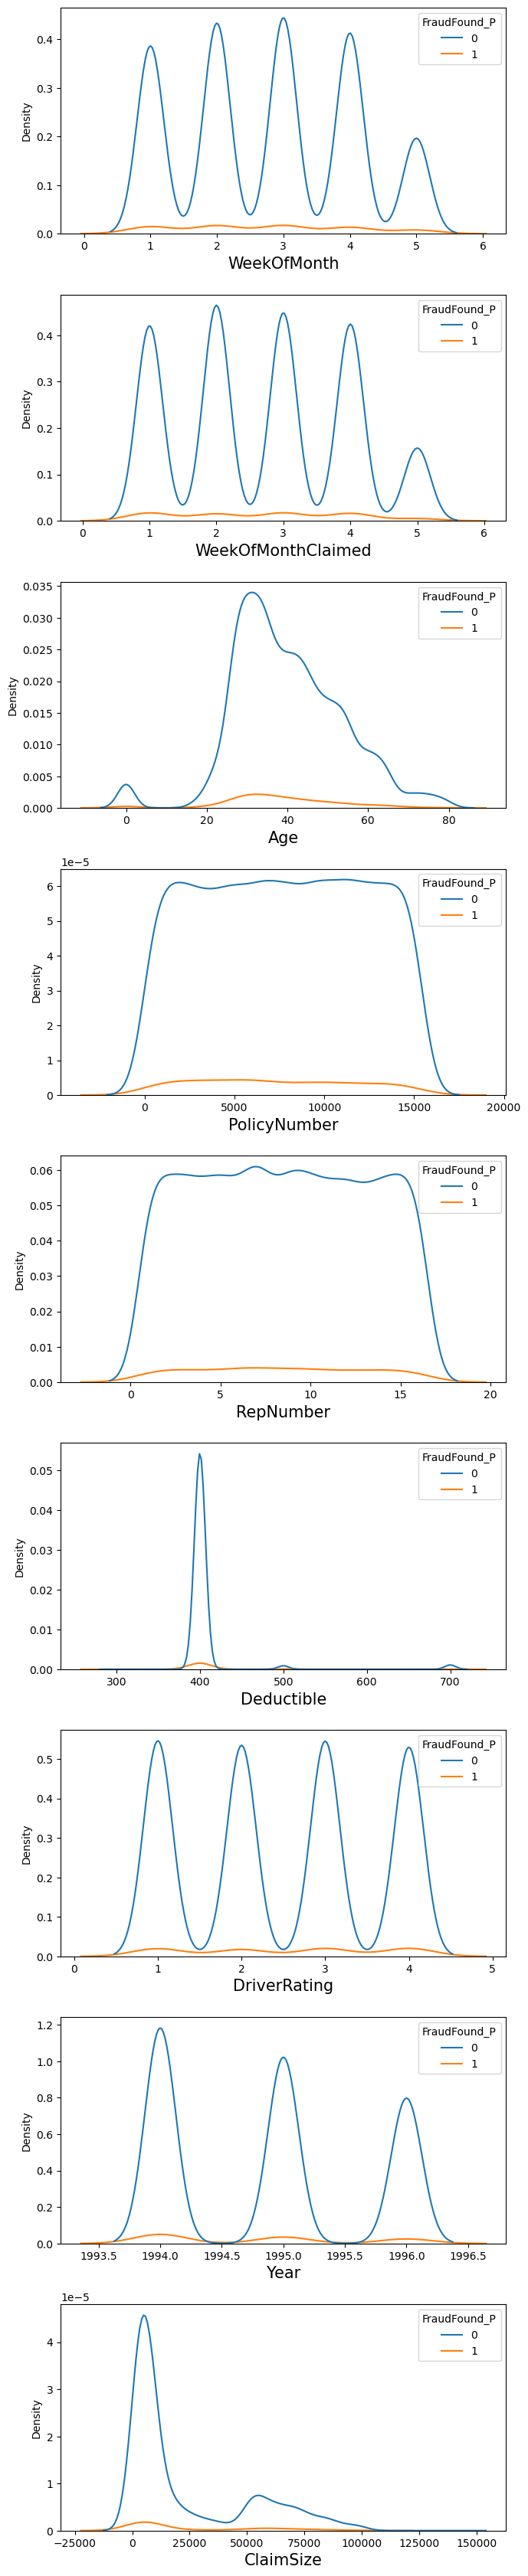

In [7]:
if not os.path.exists('Figures/Data_Exploratory'):
    os.makedirs('Figures/Data_Exploratory')
    
fig = plt.figure(figsize = (7, 37))
plotnumber = 1
for col in numeric_data.columns:
    if col == "FraudFound_P" :
        continue
    if plotnumber <= 9:
        ax = plt.subplot(10, 1, plotnumber)
        sns.kdeplot(data=numeric_data,x=col,hue="FraudFound_P")
        plt.xlabel(col, fontsize = 15)
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig('Figures/Data_Exploratory/{}.png'.format(col), bbox_inches=extent.expanded(1.2, 1.25))
    plotnumber += 1
plt.tight_layout()
plt.show()

***

### Numerical Data Corrolation With Target

***

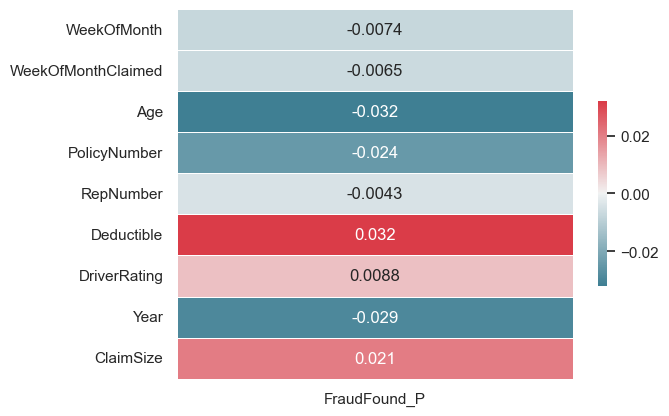

In [8]:
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plot = sns.heatmap(data.corr(numeric_only=True)["FraudFound_P"].drop("FraudFound_P").to_frame(),cmap=cmap,center=0,annot=True,linewidths=.5, cbar_kws={"shrink": .5})
fig = plot.get_figure()
fig.savefig("Figures/Data_Exploratory/numerical_Corrolation.png") 

***
### Categorical Data Distribution
***

In [9]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.nunique()

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

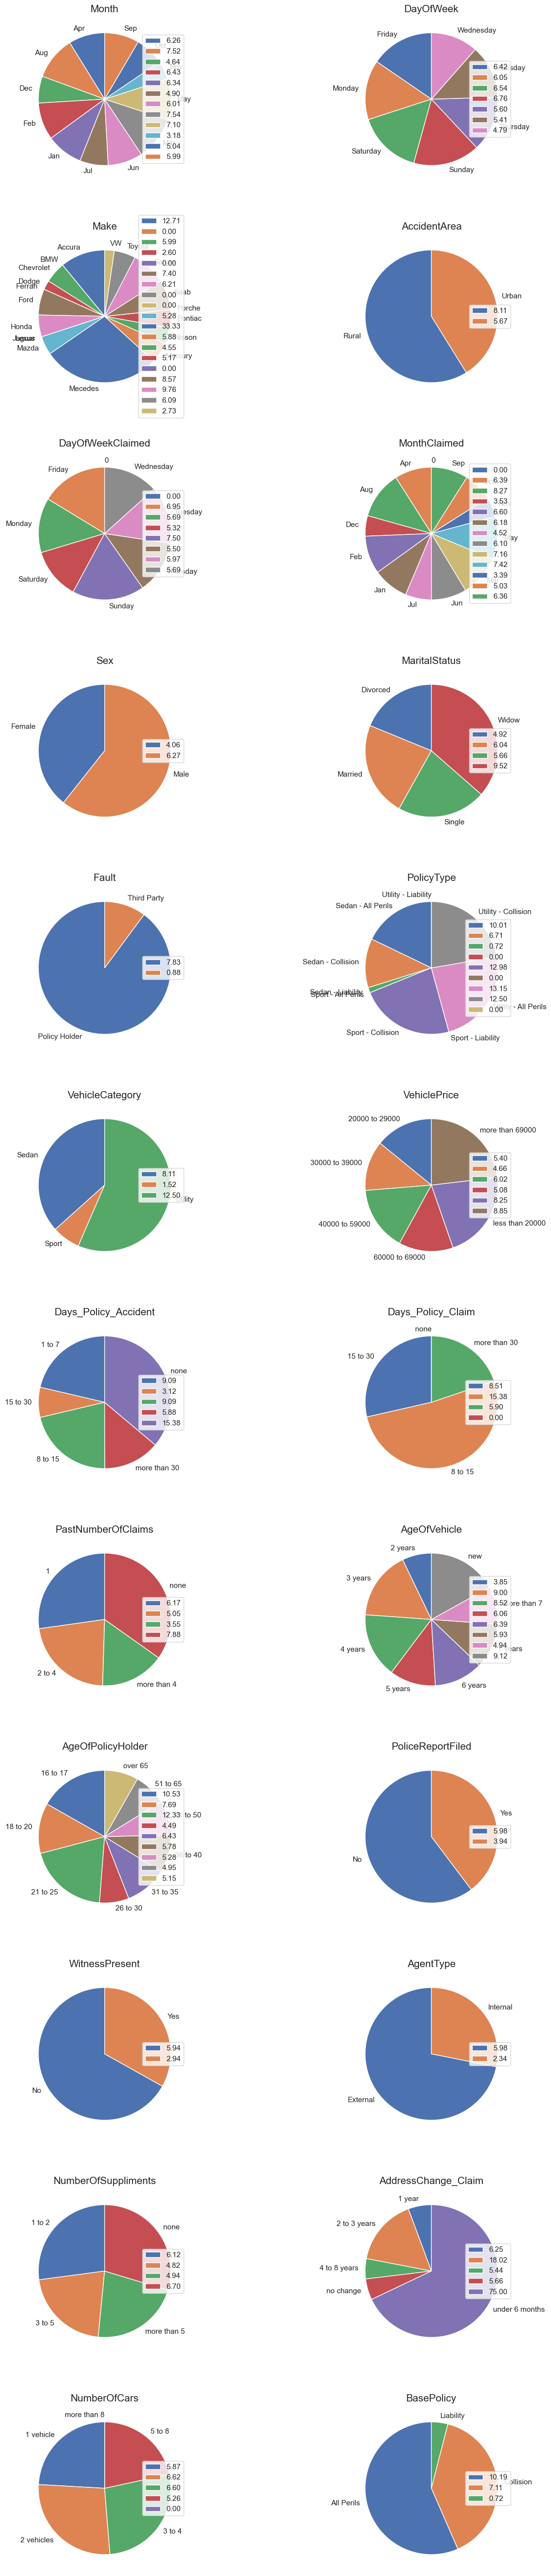

In [10]:
if not os.path.exists('Figures/Data_Exploratory'):
    os.makedirs('Figures/Data_Exploratory')
    
categorical_data["FraudFound_P"] = numeric_data["FraudFound_P"]
fig = plt.figure(figsize = (15, 53))
plotnumber = 1
for col in categorical_data.columns:
    if col == "FraudFound_P" :
        continue
    if plotnumber <= 24:
        ax = plt.subplot(12, 2, plotnumber)
        total = categorical_data.groupby(col)["FraudFound_P"].count() 
        fraud_yes_percentage = categorical_data.groupby(col)["FraudFound_P"].sum() / total *100
        patches, texts = plt.pie(fraud_yes_percentage,startangle=90,labels=fraud_yes_percentage.index)
        plt.legend(patches,[ '%.2f' % elem for elem in fraud_yes_percentage ],loc="right")
        ax.set_title(col,fontsize=15)  
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig('Figures/Data_Exploratory/{}.png'.format(col), bbox_inches=extent.expanded(1.2, 1.25))
    plotnumber += 1
plt.tight_layout()
plt.show()

***
## Results
***

In the charts above, I calculated the percentage of fraud in each group and plot it on a pie chart. The more unballanced pie chart can convey the more influence that feature has on the target.

Lest look more closely on some of the most unballanced charts and get some insights

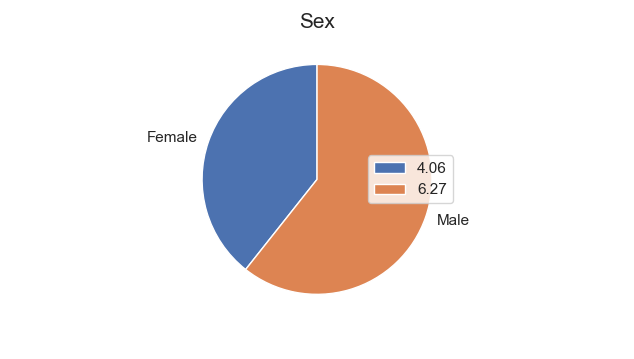

In [11]:
Image("Figures/Data_Exploratory/Sex.png")

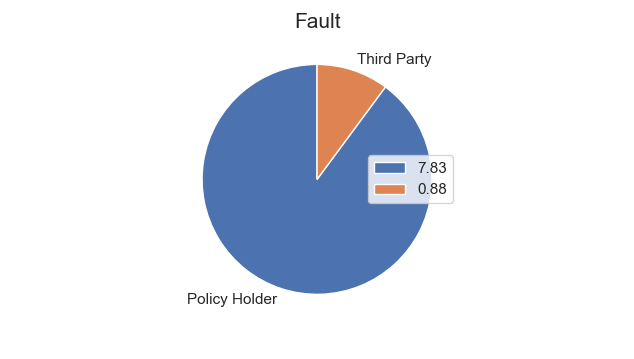

In [12]:
Image("Figures/Data_Exploratory/Fault.png")

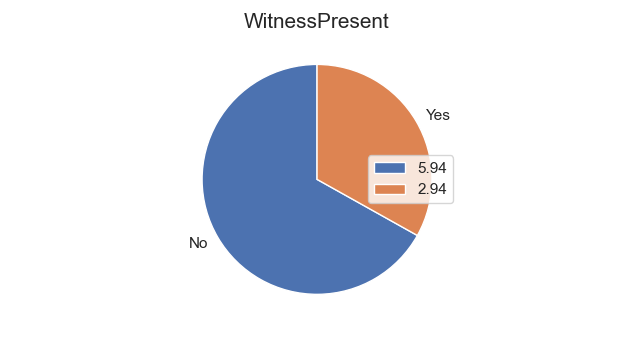

In [13]:
Image("Figures/Data_Exploratory/WitnessPresent.png")

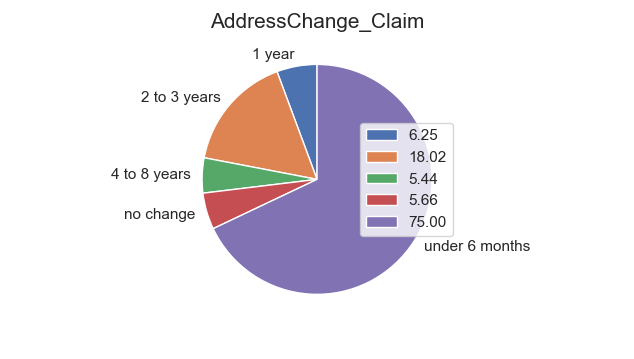

In [14]:
Image("Figures/Data_Exploratory/Addresschange_claim.png")

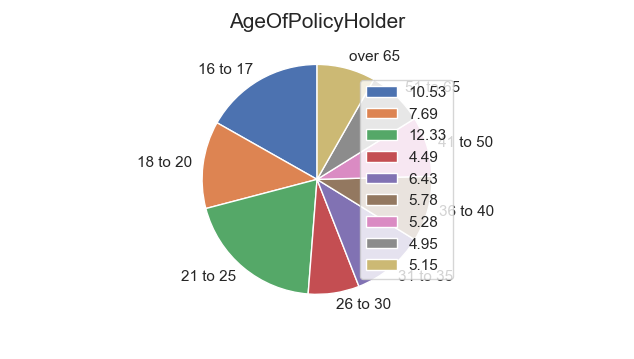

In [15]:
Image("Figures/Data_Exploratory/AgeOfPolicyHolder.png")

## Insights

This is an univariant analysis because each time we compare one feature and the output but we don't consider the combination of the features.

Our insights of the categorical data tells us :

- It is more probable to have fraud when the policyholder is a male

- It is more probable to have fraud when the policyholder is the one who caused the accident (guitly)

- It is more probable to have fraud when no witness is presented at the accident sciene 

- It is more probable to have fraud when the policyholder had a address change claim recently

- It is more probable to have fraud when the policyholder is under 25 years old

Our insights of the numerical data tells us :

- It is more probable to have fraud when the policyholder is younger
- It is more probable to have fraud when deductible is higher
- It is more probable to have fraud in the more recent years
- It is more probable to have fraud when claim size is high
